# How are code changes affecting the size of the Deno binary?

`scarf` on the Deno Discord had this question:

> Are there any guide to build a 'stripped-down' version of `deno` from source? for example, i'd like to build a deno binary that runs typescript files but other additional features like `check`, `fmt`, `jupyter`, `lsp` removed. this would be useful to reduce binary size in docker container

I figured the addition of Jupyter code was pretty small (main new requirement is zeromq, the rest is all protocols that Jupyter handles). To test that hypothesis, I calculated the Deno size between Linux canaries from dl.deno.land.

## Canary Locations

You can dowload the canary for any commit (if built successfully) with a URL like below:

`https://dl.deno.land/canary/[COMMIT_HASH]/deno-[TARGET_TUPLE].zip`

These are the currently supported target tuples:

- Apple ARM (64-bit): `aarch64-apple-darwin`

- Apple x86 (64-bit): `x86_64-apple-darwin`

- Linux x86 (64-bit): `x86_64-unknown-linux-gnu`

- Windows x86 (64-bit): `x86_64-pc-windows-msvc`

Since scarf wanted this in Docker, I'm only measuring the Linux canary.

## Methodology

- Pull the last N commits
- Determine the size by performing a `HEAD` and pulling `content-length`
- If a commit download isn't found, skip it.


In [1]:
import { fetchCanariesSinceTag, Canary } from "./mod.ts";

const canaries = await fetchCanariesSinceTag("v1.36.0");

const jupyterLines = canaries.filter((point: Canary) =>
  point.subject.includes("jupyter")
);


Commit for v1.36.0 is 6ba245fe2570b29e35a4fd296a196a58870b1e3c


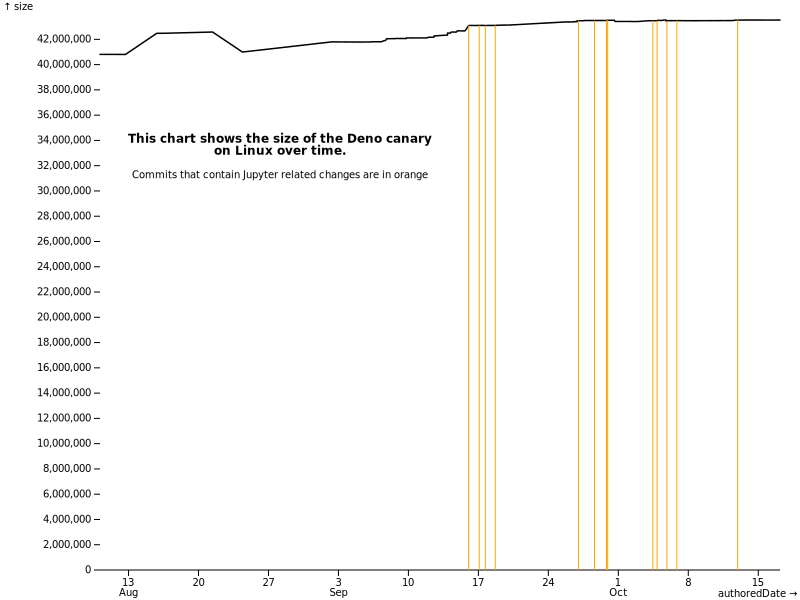

In [32]:
import Plot from "https://deno.land/x/plot/mod.ts";

Plot.plot({
  marginLeft: 100,
  height: 600,
  width: 800,
  marks: [
    Plot.lineY(canaries, {
      x: "authoredDate",
      y: "size",
    }),
    Plot.ruleY([0]),
    Plot.ruleX(jupyterLines, {
      stroke: "orange",
      x: "authoredDate",
      y2: "size",
    }),
    Plot.text(
      ["This chart shows the size of the Deno canary on Linux over time."],
      {
        lineWidth: 22,
        fontWeight: "bold",
        fontSize: "12px",
        frameAnchor: "middle",
        dx: -160,
        dy: -150,
      }
    ),

    Plot.text(["Commits that contain Jupyter related changes are in orange"], {
      lineWidth: 30,
      frameAnchor: "middle",
      dx: -160,
      dy: -120,
    }),
  ],
});
